In [1]:
import deferred_acceptance as da
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from pathlib import Path
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use(['custom_style.mplstyle'])


Bad key axes.titlefont in file custom_style.mplstyle, line 2 ('axes.titlefont: helvetica_bold')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.3/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


In [2]:
plt.rcParams.update(matplotlib.rcParamsDefault)

In [4]:
def get_polyculture_market(N, C, college_caps, diff_access=False):
    values = np.sort(np.random.uniform(size=N))
    true_college_values = [values for c in range(C)]
    true_college_prefs = da.prefs_from_values(true_college_values)
    num_apps = []
    
    student_values = [np.random.uniform(size=C) for i in range(N)]
    student_prefs = da.prefs_from_values(student_values)
    if diff_access:
        new_student_prefs = []
        for prefs in student_prefs:
            k = np.random.randint(1, C+1)
            new_student_prefs.append(prefs[:k])
            num_apps.append(k)
        student_prefs = new_student_prefs

    college_values = [values + np.random.uniform(low=-0.5, high=0.5, size=N) for c in range(C)]
    college_prefs = da.prefs_from_values(college_values)
    student_matches, college_matches = da.get_match(student_prefs, college_prefs, college_caps)

    return student_prefs, true_college_prefs, student_matches, college_matches, num_apps


def get_monoculture_market(N, C, college_caps, diff_access=False):
    values = np.sort(np.random.uniform(size=N))
    true_college_values = [values for c in range(C)]
    true_college_prefs = da.prefs_from_values(true_college_values)
    num_apps = []

    student_values = [np.random.uniform(size=C) for i in range(N)]
    student_prefs = da.prefs_from_values(student_values)
    if diff_access:
        new_student_prefs = []
        for prefs in student_prefs:
            k = np.random.randint(1, C+1)
            new_student_prefs.append(prefs[:k])
            num_apps.append(k)
        student_prefs = new_student_prefs

    scores = values + np.random.uniform(low=-0.5, high=0.5, size=N)
    college_values = [scores for c in range(C)]
    college_prefs = da.prefs_from_values(college_values)
    student_matches, college_matches = da.get_match(student_prefs, college_prefs, college_caps)

    return student_prefs, true_college_prefs, student_matches, college_matches, num_apps

In [8]:
N = 100
width = 0.01
buckets = np.arange(0, 1, width)
colors = plt.cm.cool(np.linspace(0.2, 1, 5))

plt.figure(figsize=(6, 4))
probs_list = []

for idx, C in enumerate([1, 2, 5, 10, 25]):
    lists = [[] for _ in buckets]
    for _ in range(1000):
        student_prefs, true_college_prefs, student_matches, college_matches, _ = get_polyculture_market(N=N, C=C, college_caps=[int(0.5*N/C) for _ in range(C)])

        for b, bucket in enumerate(buckets):
            for i, rank in enumerate(true_college_prefs[0]):
                if 1 - rank/N > bucket and 1 - rank/N <= bucket + width:
                    lists[b].append(student_matches[i] > -1)

    probs = []
    for li in lists:
        probs.append(np.mean(li))
    probs_list.append(probs)

<Figure size 432x288 with 0 Axes>

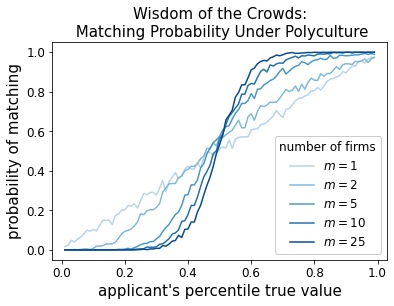

In [9]:
colors = matplotlib.colormaps['Blues'](np.linspace(0.3, 0.9, 5))

for idx, C in enumerate([1, 2, 5, 10, 25]):
    plt.plot(buckets, probs_list[idx], label=r'$m = $'+str(C), color=colors[idx])

plt.title('Wisdom of the Crowds:\n Matching Probability Under Polyculture', fontsize=15)
plt.xlabel('applicant\'s percentile true value', fontsize=15)
plt.ylabel('probability of matching', fontsize=15)
plt.xlim(-0.03, 1.03)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
legend = plt.legend(loc="lower right", fontsize=12, framealpha=1)
legend.set_frame_on(True)
legend.set_title(title='number of firms', prop={'size': 12})
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.5))
plt.grid(False)
plt.savefig('probs_matchings_poly.png', dpi=300)
plt.show()

In [10]:
N = 100
width = 0.01
buckets = np.arange(0, 1, width)
colors = plt.cm.cool(np.linspace(0.2, 1, 5))

plt.figure(figsize=(6, 4))
probs_list = []

for idx, C in enumerate([1, 2, 5, 10, 25]):
    lists = [[] for _ in buckets]
    for _ in range(1000):
        student_prefs, true_college_prefs, student_matches, college_matches, _ = get_monoculture_market(N=N, C=C, college_caps=[int(0.5*N/C) for _ in range(C)])

        for b, bucket in enumerate(buckets):
            for i, rank in enumerate(true_college_prefs[0]):
                if 1 - rank/N > bucket and 1 - rank/N <= bucket + width:
                    lists[b].append(student_matches[i] > -1)

    probs = []
    for li in lists:
        probs.append(np.mean(li))
    probs_list.append(probs)

<Figure size 432x288 with 0 Axes>

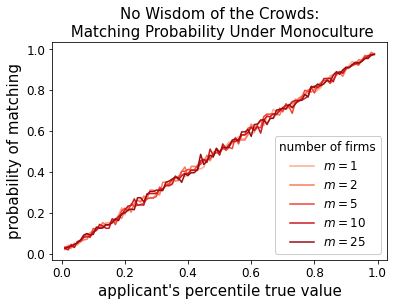

In [11]:
colors = matplotlib.colormaps['Reds'](np.linspace(0.3, 0.9, 5))

for idx, C in enumerate([1, 2, 5, 10, 25]):
    plt.plot(buckets, probs_list[idx], label=r'$m = $'+str(C), color=colors[idx])

plt.title('No Wisdom of the Crowds:\n Matching Probability Under Monoculture', fontsize=15)
plt.xlabel('applicant\'s percentile true value', fontsize=15)
plt.ylabel('probability of matching', fontsize=15)
plt.xlim(-0.03, 1.03)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
legend = plt.legend(loc="lower right", fontsize=12, framealpha=1)
legend.set_frame_on(True)
legend.set_title(title='number of firms', prop={'size': 12})
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.5))
plt.grid(False)
plt.savefig('probs_matchings_mono.png', dpi=300)
plt.show()

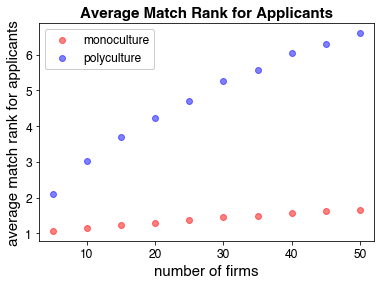

In [10]:
N = 1000
width = 0.05
buckets = np.arange(0, 1, width)

C_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

plt.figure(figsize=(6, 4))

# MONOCULTURE
avg_rank_C = []
for C in C_list:
    college_caps = [int(0.5*N/C) for _ in range(C)]
    avg_ranks = []
    for _ in range(100):
        student_prefs, true_college_prefs, student_matches, college_matches, _ = get_monoculture_market(N=N, C=C, college_caps=college_caps)
        ranks = da.student_rank_of_match(student_prefs, student_matches)
        avg_ranks.append(np.sum(ranks)/np.sum(college_caps))

    avg_rank_C.append(np.mean(avg_ranks))

plt.scatter(C_list, avg_rank_C, label='monoculture', color='red', alpha=0.5)

# POLYCULTURE
avg_rank_C = []
for C in C_list:
    college_caps = [int(0.5*N/C) for _ in range(C)]
    avg_ranks = []
    for _ in range(100):
        student_prefs, true_college_prefs, student_matches, college_matches, _ = get_polyculture_market(N=N, C=C, college_caps=college_caps)
        ranks = da.student_rank_of_match(student_prefs, student_matches)
        avg_ranks.append(np.sum(ranks)/np.sum(college_caps))

    avg_rank_C.append(np.mean(avg_ranks))

plt.scatter(C_list, avg_rank_C, label='polyculture', color='blue', alpha=0.5)
plt.title('Average Match Rank for Applicants', fontsize=15)
plt.xlabel('number of firms', fontsize=15)
plt.ylabel('average match rank for applicants', fontsize=15)
plt.xlim(3, 52)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
legend = plt.legend(loc="upper left", fontsize=12, framealpha=1)
legend.set_frame_on(True)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.5))
plt.grid(False)

plt.savefig('expected_rank.png', dpi=300)
plt.show()

/var/folders/1j/2gvg09j94934mlz9v609tcvh0000gn/T/ipykernel_23297/821417600.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/1j/2gvg09j94934mlz9v609tcvh0000gn/T/ipykernel_23297/821417600.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


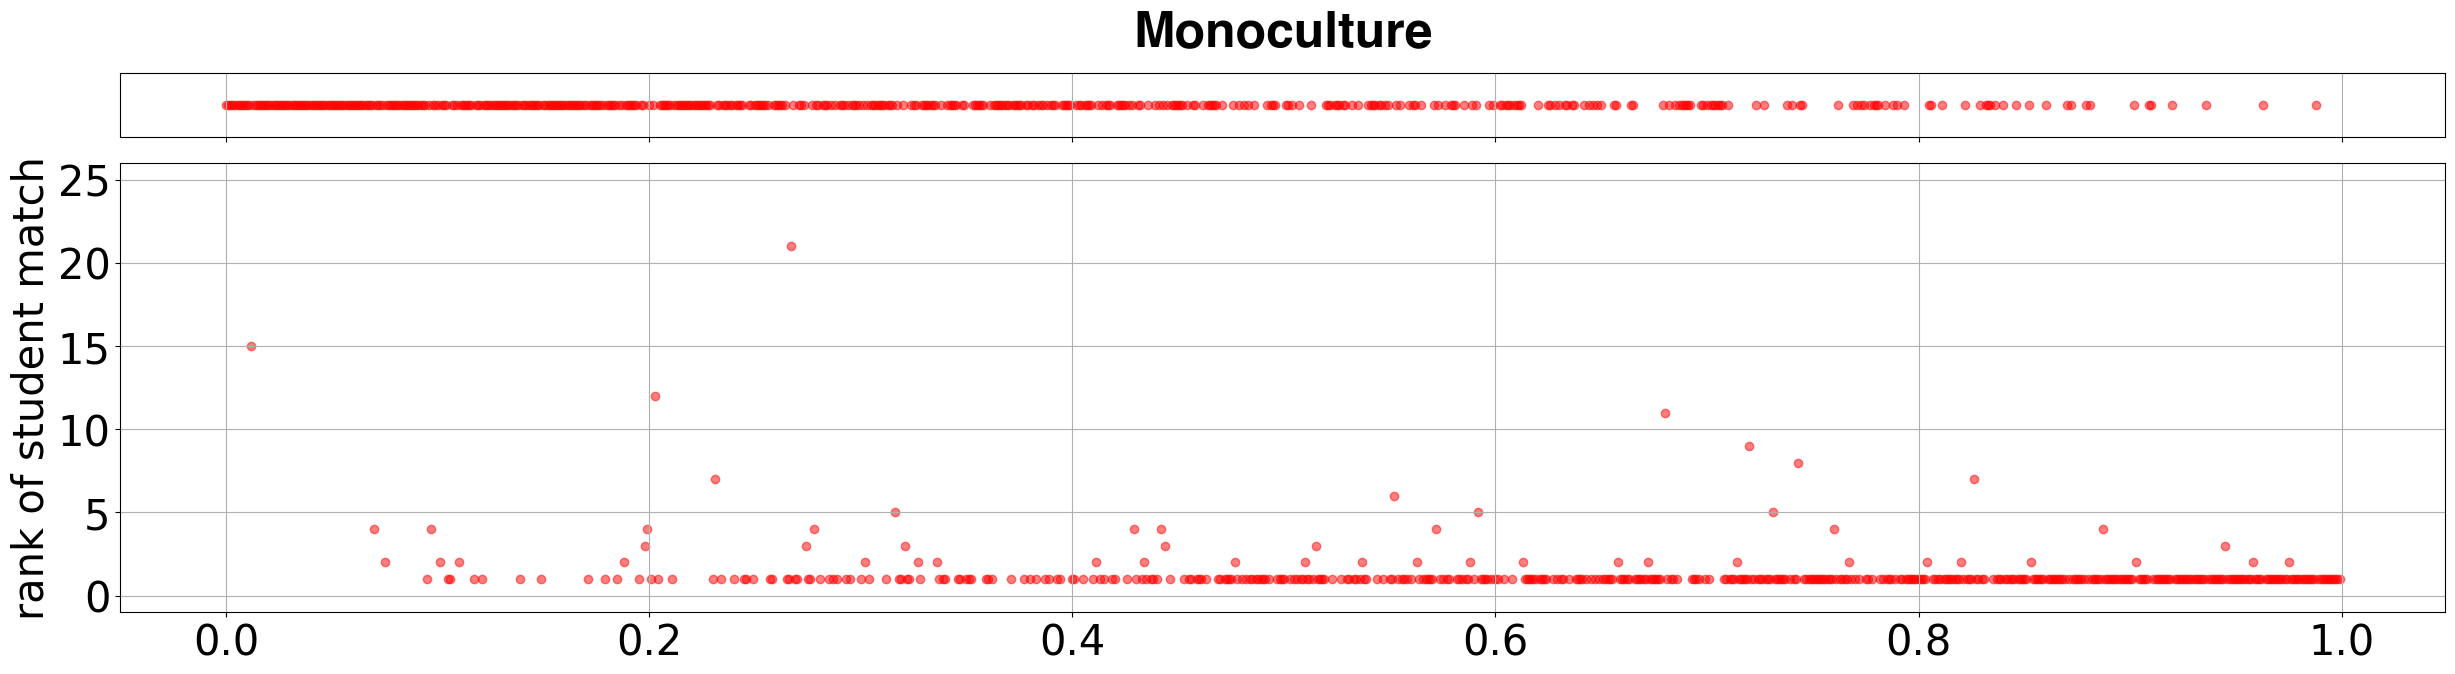

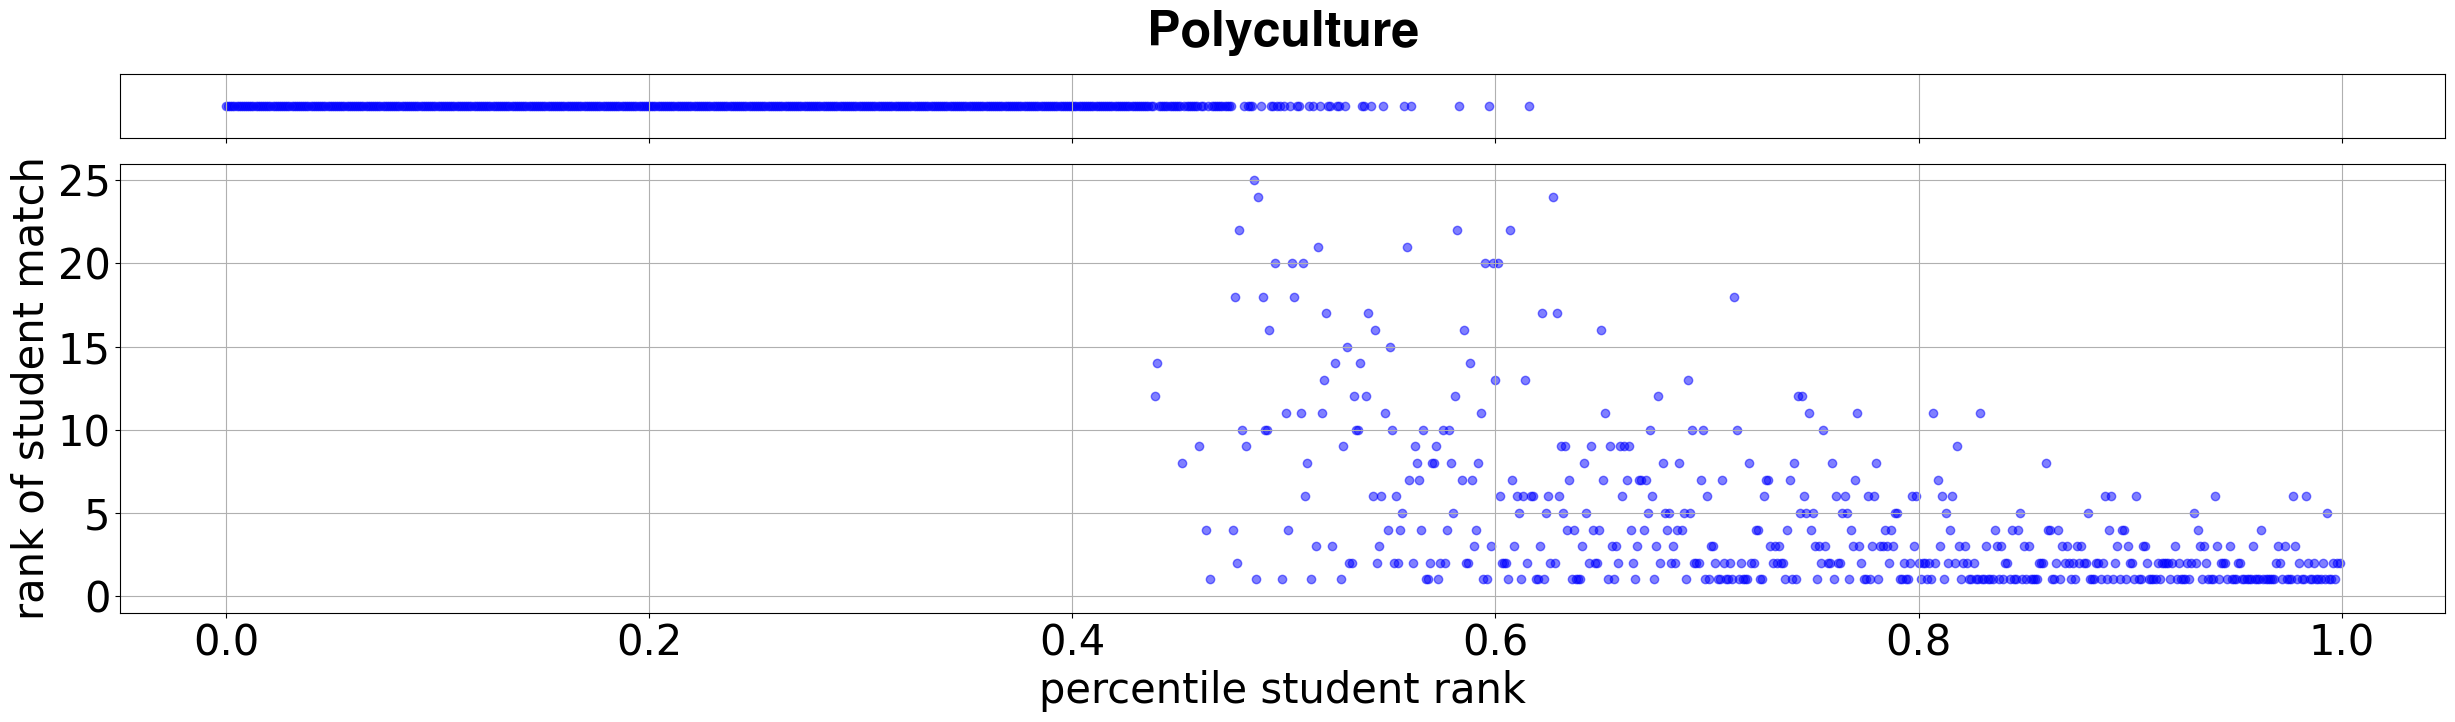

In [57]:
def student_rank_of_match(student_prefs, student_matches, unmatched_value=0):
    ranks = [unmatched_value for i in range(len(student_prefs))]
    for i in range(len(student_prefs)):
        if student_matches[i] != -1:
            ranks[i] = student_prefs[i].index(student_matches[i]) + 1    
    return ranks


N = 1000
C = 25

# MONOCULTURE

fig, axs = plt.subplots(2, figsize=(30, 7), gridspec_kw={'height_ratios': [1, 7]}, sharex=True)

avg_rank_C = []
college_caps = [int(0.5*N/C) for _ in range(C)]
student_prefs, true_college_prefs, student_matches, college_matches, _ = get_monoculture_market(N=N, C=C, college_caps=college_caps)
ranks = student_rank_of_match(student_prefs, student_matches, unmatched_value=35)
unmatched_students = []
matched_students = []
for i, match in enumerate(student_matches):
    if match == -1:
        unmatched_students.append(i)
    else:
        matched_students.append(i)

axs[0].set_title('Monoculture', pad=20)
axs[1].scatter([i/N for i in matched_students], [ranks[i] for i in matched_students], color='red', label='matched', alpha=0.5)
axs[0].scatter([i/N for i in unmatched_students], [ranks[i] for i in unmatched_students], color='red', label='unmatched', alpha=0.5)
axs[1].scatter([], [], color='#e63946', label='unmatched')
axs[1].set_ylabel('rank of student match')
axs[0].grid()
axs[1].grid()
axs[1].set_ylim(-1, 26)
axs[0].yaxis.set_major_locator(ticker.NullLocator())

for ax in fig.axes:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    ax.title.set_fontsize(36)

plt.subplots_adjust(wspace=0, hspace=0.1)

fig.savefig('ind_outcomes_mono.png', dpi=300, bbox_inches='tight')
fig.show()


# POLYCULTURE

fig, axs = plt.subplots(2, figsize=(30, 7), gridspec_kw={'height_ratios': [1, 7]}, sharex=True)

avg_rank_C = []
college_caps = [int(0.5*N/C) for _ in range(C)]
student_prefs, true_college_prefs, student_matches, college_matches, _ = get_polyculture_market(N=N, C=C, college_caps=college_caps)
ranks = student_rank_of_match(student_prefs, student_matches, unmatched_value = 35)
unmatched_students = []
matched_students = []
for i, match in enumerate(student_matches):
    if match == -1:
        unmatched_students.append(i)
    else:
        matched_students.append(i)

axs[0].set_title('Polyculture', pad=20)
axs[1].scatter([i/N for i in matched_students], [ranks[i] for i in matched_students], color='blue', label='matched', alpha=0.5)
axs[0].scatter([i/N for i in unmatched_students], [ranks[i] for i in unmatched_students], color='blue', label='unmatched', alpha=0.5)
axs[1].scatter([], [], facecolors=(0.7, 0.7, 0.9), edgecolors=(0.2, 0.2, 0.2), label='unmatched')
axs[1].set_xlabel('percentile student rank')
axs[1].set_ylabel('rank of student match')
# axs[1].legend(loc="upper right", fontsize=30)
axs[1].set_ylim(-1, 26)
axs[0].grid()
axs[1].grid()
axs[0].yaxis.set_major_locator(ticker.NullLocator())

for ax in fig.axes:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    ax.title.set_fontsize(36)

plt.subplots_adjust(wspace=0, hspace=0.1)
fig.savefig('ind_outcomes_poly.png', dpi=300, bbox_inches='tight')
fig.show()

### Differential application access

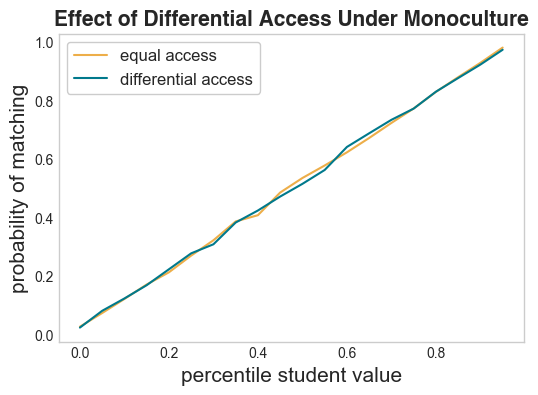

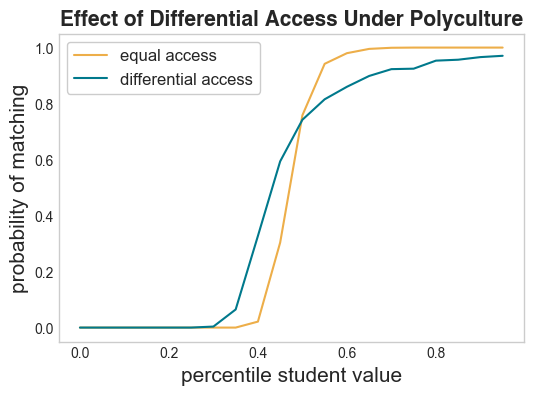

In [96]:
N = 2000
width = 0.05
buckets = np.arange(0, 1, width)
C = 25

# MONOCULTURE
plt.figure(figsize=(6, 4))

for k in [False, True]:
    lists = [[] for _ in buckets]
    for _ in range(30):
        student_prefs, true_college_prefs, student_matches, college_matches = get_monoculture_market(N=N, C=C, college_caps=[int(0.5*N/C) for _ in range(C)], diff_access=k)

        for b, bucket in enumerate(buckets):
            for i, rank in enumerate(true_college_prefs[0]):
                if 1 - rank/2000 > bucket and 1 - rank/2000 <= bucket + width:
                    lists[b].append(student_matches[i] > -1)

    probs = []
    for li in lists:
        probs.append(np.mean(li))

    if k:
        label = 'differential access'
        color = '#00798c'
    else:
        label = 'equal access'
        color = '#edae49'
    plt.plot(buckets, probs, label=label, color=color)

plt.xlabel('percentile student value', fontsize=15)
plt.ylabel('probability of matching', fontsize=15)
plt.title('Effect of Differential Access Under Monoculture', fontsize=15)
legend = plt.legend(fontsize=12)
legend.set_frame_on(True)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.5))
plt.grid(False)
plt.savefig('diff_access_monoculture', dpi=300, bbox_inches='tight')
plt.show()


# POLYCULTURE
plt.figure(figsize=(6, 4))

for k in [False, True]:
    lists = [[] for _ in buckets]
    for _ in range(30):
        student_prefs, true_college_prefs, student_matches, college_matches = get_polyculture_market(N=N, C=C, college_caps=[int(0.5*N/C) for _ in range(C)], diff_access=k)

        for b, bucket in enumerate(buckets):
            for i, rank in enumerate(true_college_prefs[0]):
                if 1 - rank/2000 > bucket and 1 - rank/2000 <= bucket + width:
                    lists[b].append(student_matches[i] > -1)

    probs = []
    for li in lists:
        probs.append(np.mean(li))

    if k:
        label = 'differential access'
        color = '#00798c'
    else:
        label = 'equal access'
        color = '#edae49'
    
    plt.plot(buckets, probs, label=label, color=color)

plt.xlabel('percentile student value', fontsize=15)
plt.ylabel('probability of matching', fontsize=15)
plt.title('Effect of Differential Access Under Polyculture', fontsize=15)
legend = plt.legend(fontsize=12)
legend.set_frame_on(True)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.5))
plt.grid(False)
plt.savefig('diff_access_polyculture', dpi=300, bbox_inches='tight')
plt.show()

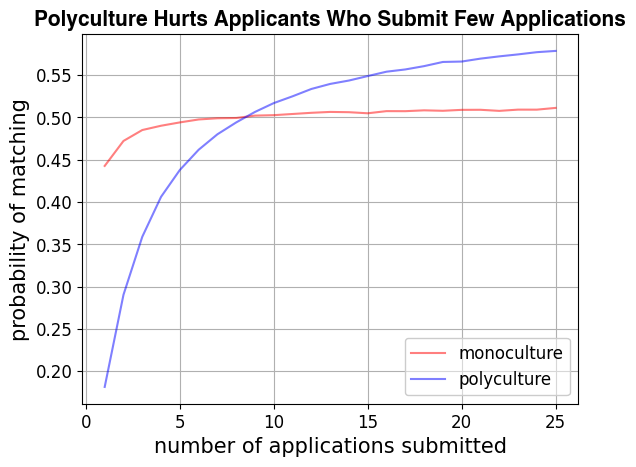

In [46]:
N = 1000
width = 0.05
buckets = range(1, C+1)
C = 25

plt.figure(figsize=(6, 4))

lists = [[] for _ in buckets]
for _ in range(10000):
    student_prefs, true_college_prefs, student_matches, college_matches, _ = get_monoculture_market(N=N, C=C, college_caps=[int(0.5*N/C) for _ in range(C)], diff_access=True)

    for b, bucket in enumerate(buckets):
        for i, prefs in enumerate(student_prefs):
            if len(student_prefs[i]) == bucket:
                lists[b].append(student_matches[i] > -1)

probs_mono = []
for li in lists:
    probs_mono.append(np.mean(li))

plt.plot(buckets, probs_mono, label='monoculture', color='red', alpha=0.5)

lists = [[] for _ in buckets]
for _ in range(10000):
    student_prefs, true_college_prefs, student_matches, college_matches, _ = get_polyculture_market(N=N, C=C, college_caps=[int(0.5*N/C) for _ in range(C)], diff_access=True)

    for b, bucket in enumerate(buckets):
        for i, prefs in enumerate(student_prefs):
            if len(student_prefs[i]) == bucket:
                lists[b].append(student_matches[i] > -1)

probs_poly = []
for li in lists:
    probs_poly.append(np.mean(li))

plt.plot(buckets, probs_poly, label='polyculture', color='blue', alpha=0.5)

plt.title('Polyculture hurts students who apply to few colleges', fontsize=15)
plt.xlabel('number of applications submitted', fontsize=15)
plt.ylabel('probability of matching', fontsize=15)
legend = plt.legend(fontsize=12, loc='lower right')
legend.set_frame_on(True)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.5))
plt.savefig('diff_access_num_apps.png', dpi=300)
plt.show()